In [1]:
import os
import sys
from random import seed, random, randint, sample

import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
import pywt
from tqdm import tqdm

import librosa
from librosa import filters, display

from keras import backend, models, callbacks, layers, regularizers, optimizers
from keras.utils import to_categorical
from tensorflow.keras.utils import plot_model

from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import MinMaxScaler
from skimage.transform import resize

import scipy
from scipy.signal import hilbert, chirp

## Sample Data

In [2]:
filename = '../data/mnist_audio/0_george_0.wav'

data, sampling_frequency = librosa.load(filename)

print(data.shape)
print('Sampling Frequency:', sampling_frequency)

(6571,)
Sampling Frequency: 22050


In [3]:
sampling_frequency = 8000
dt = 1 / sampling_frequency

frequencies = pywt.scale2frequency(wavelet='morl', 
                                   scale=np.arange(1, 64)) / dt

print('Some sample scales and frequencies associated with them:')
for scale, freq in enumerate(frequencies, start=1):
    if scale % 5 == 0:
        print(f'Scale: {scale}, Frequency: {freq:.2f}')

Some sample scales and frequencies associated with them:
Scale: 5, Frequency: 1300.00
Scale: 10, Frequency: 650.00
Scale: 15, Frequency: 433.33
Scale: 20, Frequency: 325.00
Scale: 25, Frequency: 260.00
Scale: 30, Frequency: 216.67
Scale: 35, Frequency: 185.71
Scale: 40, Frequency: 162.50
Scale: 45, Frequency: 144.44
Scale: 50, Frequency: 130.00
Scale: 55, Frequency: 118.18
Scale: 60, Frequency: 108.33


In [4]:
wavelet_coefficients, freqs = pywt.cwt(data=data,
                                       scales=np.arange(1, 64),
                                       wavelet='morl',
                                       sampling_period=dt)

print('Shape of wavelet transform: ', wavelet_coefficients.shape)

Shape of wavelet transform:  (63, 6571)


Text(0.5, 1.0, 'Scalogram')

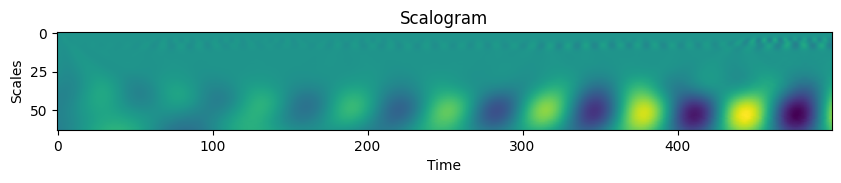

In [15]:
plt.figure(figsize=(10,10))
plt.imshow(wavelet_coefficients[:, :500])
plt.xlabel('Time')
plt.ylabel('Scales')
plt.title('Scalogram')

## Data

In [99]:
import matplotlib.pyplot as plt
from scipy import signal
from scipy.io import wavfile

sample_rate, samples = wavfile.read(filename)
sample_rate = 8000
frequencies, times, spectrogram = signal.spectrogram(samples, sample_rate)

print(samples.shape, frequencies.shape, times.shape, spectrogram.shape)

(2384,) (129,) (10,) (129, 10)


/var/folders/v8/l597fdmn691ctljk27sgct540000gn/T/ipykernel_46815/1909464157.py:5: WavFileWarning:

Reached EOF prematurely; finished at 819244 bytes, expected 819252 bytes from header.



Text(0.5, 0, 'time')

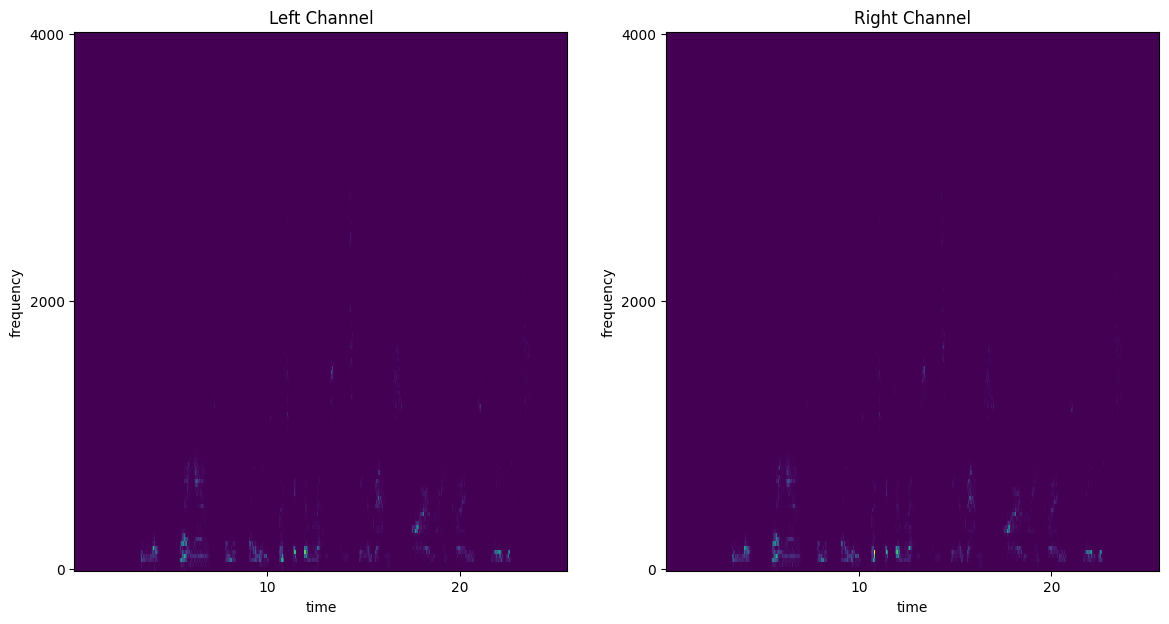

In [100]:
import matplotlib.pyplot as plt
from scipy import signal
from scipy.io import wavfile

sample_rate, samples = wavfile.read('../data/test.wav')
sample_rate = 8000
left = {}
right = {}

left['frequencies'], left['times'], left['spectrogram'] = signal.spectrogram(samples[:,0], sample_rate)
right['frequencies'], right['times'], right['spectrogram'] = signal.spectrogram(samples[:,1], sample_rate)

fig, axes = plt.subplots(1, 2)
fig.set_figheight(7)
fig.set_figwidth(14)
axes[0].pcolormesh(left['times'], left['frequencies'], left['spectrogram'])
axes[1].pcolormesh(right['times'], right['frequencies'], right['spectrogram'])
axes[0].set_title('Left Channel')
axes[1].set_title('Right Channel')

axes[0].locator_params(nbins=4)
axes[1].locator_params(nbins=4)
axes[0].set_ylabel('frequency')
axes[1].set_ylabel('frequency')
axes[0].set_xlabel('time')
axes[1].set_xlabel('time')